## Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from keras.layers import Dense, SimpleRNN, Flatten, Conv2D, LSTM, GRU
from keras import Sequential

import matplotlib.pyplot as plt

## Data

In [2]:
data = pd.read_csv('C:/Users/trolltastic/Downloads/PS4data/data.txt', delimiter=' ', header=None)

In [3]:
data = data.values.reshape(10000, 51, 1)

## Slicing the data into 70/30

In [4]:
x_train = data[0:7000, 0:50]
y_train = data[0:7000, -1]

x_test = data[7000:10000, 0:50]
y_test = data[7000:10000, -1]

x_predictions = data[7000:7005, 0:50]
y_predictions = data[7000:7005, -1]

## Loss Function
Since this is a regression task, linear is the best option to include negative numbers as well.

In [5]:
model = Sequential()
model.add(GRU(15, return_sequences=True))
model.add(GRU(15))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.build(x_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (7000, 50, 15)            810       
                                                                 
 gru_1 (GRU)                 (7000, 15)                1440      
                                                                 
 dense (Dense)               (7000, 1)                 16        
                                                                 
Total params: 2,266
Trainable params: 2,266
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, validation_split=0.1, batch_size=32, epochs=15)

Epoch 1/15
197/197 [==============================] - 5s 11ms/step - loss: 0.0382 - val_loss: 0.0168
Epoch 2/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0085 - val_loss: 0.0055
Epoch 3/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 4/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 5/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 6/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 7/15
197/197 [==============================] - 2s 10ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/15
197/197 [==============================] - 2s 10ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 9/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 10/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0041 - val_loss: 0.0

In [7]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 4ms/step - loss: 0.0038


0.003760039107874036

Record 1 Prediction: [0.43441567]
Record 2 Prediction: [0.10477256]
Record 3 Prediction: [0.52015555]
Record 4 Prediction: [0.32974413]
Record 5 Prediction: [-0.31204587]


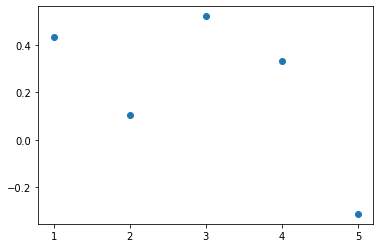

In [9]:
pred = model.predict(x_predictions)
for p in range(len(pred)):
    print(f'Record {p + 1} Prediction: {pred[p]}')
plt.scatter([i for i in range(1, len(x_predictions) + 1)], pred)
plt.xticks(range(1, len(x_predictions) + 1))
plt.show()

Record 1 Prediction: [0.39919338, 0.37437972, 0.38531363, 0.43371925, 0.49966842]
Record 2 Prediction: [0.07614626, 0.098230995, 0.18509032, 0.30232885, 0.40701103]
Record 3 Prediction: [0.5604709, 0.56973076, 0.543557, 0.4885121, 0.4228699]
Record 4 Prediction: [0.27496293, 0.24239174, 0.25239366, 0.29637352, 0.35382888]
Record 5 Prediction: [-0.49734426, -0.67199934, -0.7461647, -0.7311173, -0.6620852]


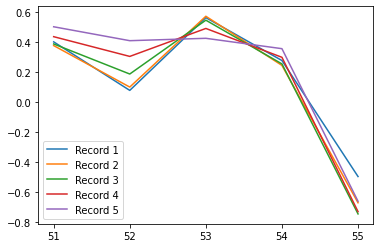

In [10]:
all_predicted = []

for p in range(len(pred)):
    predicted = []
    
    base = x_predictions[p, 0:49]
    base = np.append(base, pred[p]).reshape(1, -1)
    
    new_pred = model.predict(base)
    predicted.append(new_pred[0][0])
    base = np.append(base, new_pred)
    
    for i in range(4):
        base = base[1:51]
        new_pred = model.predict(base.reshape(1, -1))
        predicted.append(new_pred[0][0])
        base = np.append(base, new_pred)
    
    all_predicted.append(predicted)

for i in range(len(all_predicted)):
    print(f'Record {i + 1} Prediction: {all_predicted[i]}')
timesteps = [51, 52, 53, 54, 55]
plt.plot(timesteps, all_predicted)
plt.xticks(range(51, 56))
plt.legend(['Record 1', 'Record 2', 'Record 3', 'Record 4', 'Record 5'])

plt.show()

        

In [11]:
x_train2 = data[0:7000, 0:46]
y_train2 = data[0:7000, 46:51]

x_test2 = data[7000:10000, 0:46]
y_test2 = data[7000:10000, 46:51]

x_predictions2 = data[7000:7005, 0:46]
y_predictions2 = data[7000:7005, 46:51]

In [12]:
model2 = Sequential()
model2.add(GRU(15, return_sequences=True))
model2.add(GRU(15))
model2.add(Dense(5, activation='linear'))
model2.compile(loss='mse', optimizer='adam')
model2.build(x_train2.shape)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (7000, 46, 15)            810       
                                                                 
 gru_3 (GRU)                 (7000, 15)                1440      
                                                                 
 dense_1 (Dense)             (7000, 5)                 80        
                                                                 
Total params: 2,330
Trainable params: 2,330
Non-trainable params: 0
_________________________________________________________________


In [13]:
model2.fit(x_train2, y_train2, validation_split=0.1, batch_size=32, epochs=15)

Epoch 1/15
197/197 [==============================] - 4s 10ms/step - loss: 0.0781 - val_loss: 0.0557
Epoch 2/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0510 - val_loss: 0.0479
Epoch 3/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0425 - val_loss: 0.0388
Epoch 4/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0328 - val_loss: 0.0284
Epoch 5/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0254 - val_loss: 0.0247
Epoch 6/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0211 - val_loss: 0.0206
Epoch 7/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0190 - val_loss: 0.0193
Epoch 8/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0178 - val_loss: 0.0183
Epoch 9/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0169 - val_loss: 0.0166
Epoch 10/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0157 - val_loss: 0.015

In [14]:
model2.evaluate(x_test2, y_test2)

94/94 [==============================] - 0s 4ms/step - loss: 0.0126


0.012641871348023415

Record 1 Prediction: [0.3051544  0.37476015 0.32063717 0.25540918 0.09806693]
Record 2 Prediction: [0.3410113  0.37864524 0.36684683 0.2968223  0.29830685]
Record 3 Prediction: [0.36510697 0.4072667  0.42187646 0.38766915 0.3438771 ]
Record 4 Prediction: [0.48795658 0.43346316 0.3621942  0.28713852 0.2766992 ]
Record 5 Prediction: [ 0.28487846  0.161779   -0.05156094 -0.19380653 -0.35812792]


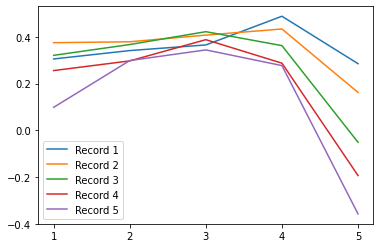

In [16]:
pred2 = model2.predict(x_predictions2)
for p in range(len(pred2)):
    print(f'Record {p + 1} Prediction: {pred2[p]}')
    
plt.plot([i for i in range(1, len(x_predictions2) + 1)], pred2)
plt.xticks(range(1, len(x_predictions2) + 1))
plt.legend(['Record 1', 'Record 2', 'Record 3', 'Record 4', 'Record 5'])
plt.show()

In [17]:
# You will need to adjust X and Y. Consider the following:
# X[0 - 46]
# Y1 = X[1-5], Y2 = X[2-6], Y3 = X[3-7] .... Ylast = X[47-51]
step_count = 51 - 5 # which implies X[0:46]
Y_outputs = 5
Y_seq = np.empty( (10000, step_count, Y_outputs) )
for next in range(1, Y_outputs - 1):
    # for all rows and for all time steps, set Y output vector
    Y_seq[ :, :, next-1 ] = data[ :, next:next+step_count, 0]

In [18]:
x_train3 = data[0:7000, 0:46]
y_train3 = Y_seq[0:7000]

x_test3 = data[7000:10000, 0:46]
y_test3 = Y_seq[7000:10000]

x_predictions3 = data[7000:7005, 0:46]
y_predictions3 = Y_seq[7000:7005]

In [19]:
model3 = Sequential()
model3.add(GRU(15, return_sequences=True))
model3.add(GRU(15, return_sequences=True))
model3.add(Dense(5, activation='linear'))
model3.compile(loss='mse', optimizer='adam')
model3.build(x_train3.shape)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (7000, 46, 15)            810       
                                                                 
 gru_5 (GRU)                 (7000, 46, 15)            1440      
                                                                 
 dense_2 (Dense)             (7000, 46, 5)             80        
                                                                 
Total params: 2,330
Trainable params: 2,330
Non-trainable params: 0
_________________________________________________________________


In [20]:
model3.fit(x_train3, y_train3, validation_split=0.1, batch_size=32, epochs=15)

Epoch 1/15
197/197 [==============================] - 4s 11ms/step - loss: 0.0474 - val_loss: 0.0238
Epoch 2/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0154 - val_loss: 0.0114
Epoch 3/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 4/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 5/15
197/197 [==============================] - 2s 9ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 6/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 7/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 8/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0088 - val_loss: 0.0086
Epoch 9/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 10/15
197/197 [==============================] - 2s 8ms/step - loss: 0.0086 - val_loss: 0.008

In [21]:
model3.evaluate(x_test3, y_test3)

94/94 [==============================] - 0s 4ms/step - loss: 0.0082


0.008189008571207523

Record 1 Prediction: [0.34568417]
Record 2 Prediction: [0.36955565]
Record 3 Prediction: [0.36983392]
Record 4 Prediction: [0.54323363]
Record 5 Prediction: [0.32459334]


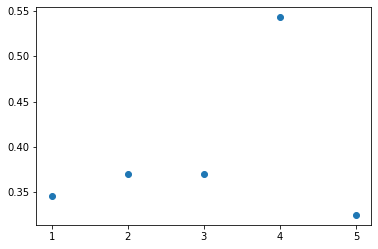

In [22]:
pred3 = model.predict(x_predictions3)
for p in range(len(pred3)):
    print(f'Record {p + 1} Prediction: {pred3[p]}')
plt.scatter([i for i in range(1, len(x_predictions3) + 1)], pred3)
plt.xticks(range(1, len(x_predictions3) + 1))

plt.show()